In [104]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, Conv3D, UpSampling2D, InputLayer, Conv2DTranspose, Input, Reshape, concatenate, Activation, Dense, Dropout, Flatten
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from skimage.transform import resize
from skimage.io import imsave
from time import time
import numpy as np
import os
import random
from PIL import Image, ImageFile

In [14]:
path = 'D:/Data/archive/Data'
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1. / 255)

In [15]:
train = train_datagen.flow_from_directory(path, target_size=(256, 256),batch_size=32,class_mode=None)

Found 6287 images belonging to 1 classes.


In [16]:
x=[]
img = train[0][1]

In [23]:
img

array([[[0.86274517, 0.5882353 , 0.39607847],
        [0.8352942 , 0.5647059 , 0.4039216 ],
        [0.8196079 , 0.54901963, 0.427451  ],
        ...,
        [0.7803922 , 0.6156863 , 0.52156866],
        [0.7803922 , 0.6039216 , 0.5137255 ],
        [0.7803922 , 0.6039216 , 0.5137255 ]],

       [[0.83921576, 0.5647059 , 0.3647059 ],
        [0.8196079 , 0.5529412 , 0.37647063],
        [0.8078432 , 0.5411765 , 0.38823533],
        ...,
        [0.8000001 , 0.61960787, 0.5176471 ],
        [0.79215693, 0.6117647 , 0.50980395],
        [0.78823537, 0.60784316, 0.5058824 ]],

       [[0.90196085, 0.5882353 , 0.39607847],
        [0.89019614, 0.58431375, 0.3921569 ],
        [0.882353  , 0.58431375, 0.3921569 ],
        ...,
        [0.8078432 , 0.62352943, 0.5058824 ],
        [0.8000001 , 0.6156863 , 0.49803925],
        [0.79215693, 0.60784316, 0.4901961 ]],

       ...,

       [[0.09019608, 0.1764706 , 0.        ],
        [0.03137255, 0.0627451 , 0.        ],
        [0.02745098, 0

In [21]:
lab = rgb2lab(img)

In [25]:
lab

array([[[ 67.99953   ,  21.092445  ,  36.32573   ],
        [ 65.807106  ,  21.652222  ,  32.30896   ],
        [ 64.49844   ,  22.765219  ,  27.244354  ],
        ...,
        [ 67.984856  ,  12.204111  ,  18.517124  ],
        [ 67.19749   ,  13.589263  ,  18.538057  ],
        [ 67.19749   ,  13.589263  ,  18.538057  ]],

       [[ 65.77692   ,  21.214516  ,  37.64211   ],
        [ 64.525795  ,  21.030695  ,  34.35848   ],
        [ 63.50998   ,  21.695019  ,  31.373346  ],
        ...,
        [ 68.72173   ,  13.513088  ,  20.160723  ],
        [ 67.98181   ,  13.562441  ,  20.215427  ],
        [ 67.611305  ,  13.587416  ,  20.243095  ]],

       [[ 69.168816  ,  25.146187  ,  38.038517  ],
        [ 68.56961   ,  24.389118  ,  37.74307   ],
        [ 68.33365   ,  23.579538  ,  37.397934  ],
        ...,
        [ 69.115776  ,  13.399929  ,  22.376764  ],
        [ 68.37722   ,  13.451666  ,  22.436142  ],
        [ 67.637215  ,  13.504267  ,  22.496426  ]],

       ...,

      

In [42]:
lab[:,:,:2].shape

(256, 256, 2)

In [17]:
X =[]
Y =[]
for img in train[0]:
  try:
      lab = rgb2lab(img)
      X.append(lab[:,:,0])
      Y.append(lab[:,:,1:] / 128)
  except:
     print('error')
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape+(1,))
print(X.shape)
print(Y.shape)

(32, 256, 256, 1)
(32, 256, 256, 2)


In [43]:
#Encoder
encoder_input = Input(shape=(256, 256, 1,))
encoder_output = Conv2D(64, (3,3), activation='relu', padding='same', strides=2)(encoder_input)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(128, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same', strides=2)(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(512, (3,3), activation='relu', padding='same')(encoder_output)
encoder_output = Conv2D(256, (3,3), activation='relu', padding='same')(encoder_output)
#Decoder
decoder_output = Conv2D(128, (3,3), activation='relu', padding='same')(encoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(64, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
decoder_output = Conv2D(32, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(16, (3,3), activation='relu', padding='same')(decoder_output)
decoder_output = Conv2D(2, (3, 3), activation='tanh', padding='same')(decoder_output)
decoder_output = UpSampling2D((2, 2))(decoder_output)
model = Model(inputs=encoder_input, outputs=decoder_output)

In [45]:
model.compile(optimizer='adam', loss='mse' , metrics=['accuracy'])
model.fit(X,Y,validation_split=0.2, epochs=500 )

Epoch 1/500
1/1 [==============================] - 1s 562ms/step - loss: 0.0106 - accuracy: 0.6041 - val_loss: 0.0176 - val_accuracy: 0.5695
Epoch 2/500
1/1 [==============================] - 0s 365ms/step - loss: 0.0112 - accuracy: 0.5680 - val_loss: 0.0180 - val_accuracy: 0.5671
Epoch 3/500
1/1 [==============================] - 0s 366ms/step - loss: 0.0112 - accuracy: 0.5574 - val_loss: 0.0180 - val_accuracy: 0.5685
Epoch 4/500
1/1 [==============================] - 0s 417ms/step - loss: 0.0112 - accuracy: 0.5566 - val_loss: 0.0180 - val_accuracy: 0.5750
Epoch 5/500
1/1 [==============================] - 0s 428ms/step - loss: 0.0112 - accuracy: 0.6005 - val_loss: 0.0178 - val_accuracy: 0.5705
Epoch 6/500
1/1 [==============================] - 0s 483ms/step - loss: 0.0117 - accuracy: 0.5644 - val_loss: 0.0180 - val_accuracy: 0.5669
Epoch 7/500
1/1 [==============================] - 0s 445ms/step - loss: 0.0111 - accuracy: 0.6223 - val_loss: 0.0180 - val_accuracy: 0.5536
Epoch 8/500
1

Epoch 59/500
1/1 [==============================] - 0s 449ms/step - loss: 0.0101 - accuracy: 0.6610 - val_loss: 0.0180 - val_accuracy: 0.5796
Epoch 60/500
1/1 [==============================] - 0s 440ms/step - loss: 0.0103 - accuracy: 0.6762 - val_loss: 0.0179 - val_accuracy: 0.5901
Epoch 61/500
1/1 [==============================] - 0s 468ms/step - loss: 0.0102 - accuracy: 0.6745 - val_loss: 0.0176 - val_accuracy: 0.5854
Epoch 62/500
1/1 [==============================] - 0s 470ms/step - loss: 0.0100 - accuracy: 0.6490 - val_loss: 0.0172 - val_accuracy: 0.5900
Epoch 63/500
1/1 [==============================] - 0s 401ms/step - loss: 0.0099 - accuracy: 0.6464 - val_loss: 0.0172 - val_accuracy: 0.5906
Epoch 64/500
1/1 [==============================] - 0s 429ms/step - loss: 0.0098 - accuracy: 0.6475 - val_loss: 0.0183 - val_accuracy: 0.5955
Epoch 65/500
1/1 [==============================] - 0s 456ms/step - loss: 0.0098 - accuracy: 0.6705 - val_loss: 0.0179 - val_accuracy: 0.5980
Epoch 

1/1 [==============================] - 0s 438ms/step - loss: 0.0084 - accuracy: 0.7048 - val_loss: 0.0169 - val_accuracy: 0.5879
Epoch 117/500
1/1 [==============================] - 0s 432ms/step - loss: 0.0097 - accuracy: 0.7185 - val_loss: 0.0203 - val_accuracy: 0.5325
Epoch 118/500
1/1 [==============================] - 0s 445ms/step - loss: 0.0102 - accuracy: 0.6578 - val_loss: 0.0186 - val_accuracy: 0.5718
Epoch 119/500
1/1 [==============================] - 0s 465ms/step - loss: 0.0102 - accuracy: 0.6498 - val_loss: 0.0173 - val_accuracy: 0.5858
Epoch 120/500
1/1 [==============================] - 0s 413ms/step - loss: 0.0101 - accuracy: 0.6654 - val_loss: 0.0175 - val_accuracy: 0.5822
Epoch 121/500
1/1 [==============================] - 0s 447ms/step - loss: 0.0101 - accuracy: 0.6476 - val_loss: 0.0171 - val_accuracy: 0.5794
Epoch 122/500
1/1 [==============================] - 0s 419ms/step - loss: 0.0098 - accuracy: 0.7026 - val_loss: 0.0171 - val_accuracy: 0.5921
Epoch 123/500

1/1 [==============================] - 1s 506ms/step - loss: 0.0079 - accuracy: 0.7396 - val_loss: 0.0183 - val_accuracy: 0.5583
Epoch 174/500
1/1 [==============================] - 0s 439ms/step - loss: 0.0085 - accuracy: 0.7235 - val_loss: 0.0181 - val_accuracy: 0.5910
Epoch 175/500
1/1 [==============================] - 1s 508ms/step - loss: 0.0084 - accuracy: 0.7286 - val_loss: 0.0175 - val_accuracy: 0.6028
Epoch 176/500
1/1 [==============================] - 0s 454ms/step - loss: 0.0082 - accuracy: 0.7328 - val_loss: 0.0185 - val_accuracy: 0.5840
Epoch 177/500
1/1 [==============================] - 0s 443ms/step - loss: 0.0089 - accuracy: 0.7139 - val_loss: 0.0180 - val_accuracy: 0.5905
Epoch 178/500
1/1 [==============================] - 1s 505ms/step - loss: 0.0082 - accuracy: 0.7198 - val_loss: 0.0174 - val_accuracy: 0.5793
Epoch 179/500
1/1 [==============================] - 0s 477ms/step - loss: 0.0083 - accuracy: 0.7353 - val_loss: 0.0195 - val_accuracy: 0.5676
Epoch 180/500

1/1 [==============================] - 0s 463ms/step - loss: 0.0055 - accuracy: 0.7639 - val_loss: 0.0186 - val_accuracy: 0.5947
Epoch 231/500
1/1 [==============================] - 0s 455ms/step - loss: 0.0059 - accuracy: 0.7685 - val_loss: 0.0194 - val_accuracy: 0.5530
Epoch 232/500
1/1 [==============================] - 0s 458ms/step - loss: 0.0058 - accuracy: 0.7724 - val_loss: 0.0188 - val_accuracy: 0.5516
Epoch 233/500
1/1 [==============================] - 0s 498ms/step - loss: 0.0057 - accuracy: 0.7784 - val_loss: 0.0184 - val_accuracy: 0.5668
Epoch 234/500
1/1 [==============================] - 0s 468ms/step - loss: 0.0058 - accuracy: 0.7793 - val_loss: 0.0185 - val_accuracy: 0.5756
Epoch 235/500
1/1 [==============================] - 0s 470ms/step - loss: 0.0052 - accuracy: 0.7817 - val_loss: 0.0193 - val_accuracy: 0.5741
Epoch 236/500
1/1 [==============================] - 0s 460ms/step - loss: 0.0053 - accuracy: 0.7754 - val_loss: 0.0194 - val_accuracy: 0.5788
Epoch 237/500

1/1 [==============================] - 0s 453ms/step - loss: 0.0028 - accuracy: 0.8367 - val_loss: 0.0182 - val_accuracy: 0.5723
Epoch 288/500
1/1 [==============================] - 0s 465ms/step - loss: 0.0027 - accuracy: 0.8442 - val_loss: 0.0180 - val_accuracy: 0.5780
Epoch 289/500
1/1 [==============================] - 0s 462ms/step - loss: 0.0027 - accuracy: 0.8454 - val_loss: 0.0191 - val_accuracy: 0.5709
Epoch 290/500
1/1 [==============================] - 1s 565ms/step - loss: 0.0027 - accuracy: 0.8397 - val_loss: 0.0181 - val_accuracy: 0.5862
Epoch 291/500
1/1 [==============================] - 0s 482ms/step - loss: 0.0028 - accuracy: 0.8453 - val_loss: 0.0187 - val_accuracy: 0.5693
Epoch 292/500
1/1 [==============================] - 1s 522ms/step - loss: 0.0027 - accuracy: 0.8437 - val_loss: 0.0180 - val_accuracy: 0.5741
Epoch 293/500
1/1 [==============================] - 0s 468ms/step - loss: 0.0026 - accuracy: 0.8470 - val_loss: 0.0179 - val_accuracy: 0.5727
Epoch 294/500

1/1 [==============================] - 0s 459ms/step - loss: 0.0019 - accuracy: 0.8605 - val_loss: 0.0187 - val_accuracy: 0.5609
Epoch 345/500
1/1 [==============================] - 0s 449ms/step - loss: 0.0019 - accuracy: 0.8559 - val_loss: 0.0178 - val_accuracy: 0.5835
Epoch 346/500
1/1 [==============================] - 0s 469ms/step - loss: 0.0020 - accuracy: 0.8697 - val_loss: 0.0186 - val_accuracy: 0.5586
Epoch 347/500
1/1 [==============================] - 1s 502ms/step - loss: 0.0022 - accuracy: 0.8661 - val_loss: 0.0180 - val_accuracy: 0.5747
Epoch 348/500
1/1 [==============================] - 0s 462ms/step - loss: 0.0021 - accuracy: 0.8703 - val_loss: 0.0180 - val_accuracy: 0.5881
Epoch 349/500
1/1 [==============================] - 1s 512ms/step - loss: 0.0020 - accuracy: 0.8664 - val_loss: 0.0185 - val_accuracy: 0.5673
Epoch 350/500
1/1 [==============================] - 0s 482ms/step - loss: 0.0020 - accuracy: 0.8481 - val_loss: 0.0183 - val_accuracy: 0.5715
Epoch 351/500

1/1 [==============================] - 0s 485ms/step - loss: 0.0017 - accuracy: 0.8773 - val_loss: 0.0180 - val_accuracy: 0.5790
Epoch 402/500
1/1 [==============================] - 0s 452ms/step - loss: 0.0017 - accuracy: 0.8782 - val_loss: 0.0180 - val_accuracy: 0.5763
Epoch 403/500
1/1 [==============================] - 0s 464ms/step - loss: 0.0017 - accuracy: 0.8789 - val_loss: 0.0181 - val_accuracy: 0.5770
Epoch 404/500
1/1 [==============================] - 1s 511ms/step - loss: 0.0017 - accuracy: 0.8814 - val_loss: 0.0181 - val_accuracy: 0.5845
Epoch 405/500
1/1 [==============================] - 0s 463ms/step - loss: 0.0017 - accuracy: 0.8843 - val_loss: 0.0183 - val_accuracy: 0.5823
Epoch 406/500
1/1 [==============================] - 0s 467ms/step - loss: 0.0016 - accuracy: 0.8837 - val_loss: 0.0183 - val_accuracy: 0.5769
Epoch 407/500
1/1 [==============================] - 0s 460ms/step - loss: 0.0016 - accuracy: 0.8836 - val_loss: 0.0181 - val_accuracy: 0.5806
Epoch 408/500

1/1 [==============================] - 1s 871ms/step - loss: 0.0013 - accuracy: 0.9021 - val_loss: 0.0183 - val_accuracy: 0.5660
Epoch 459/500
1/1 [==============================] - 1s 879ms/step - loss: 0.0013 - accuracy: 0.9000 - val_loss: 0.0184 - val_accuracy: 0.5717
Epoch 460/500
1/1 [==============================] - 1s 1s/step - loss: 0.0013 - accuracy: 0.9022 - val_loss: 0.0183 - val_accuracy: 0.5681
Epoch 461/500
1/1 [==============================] - 1s 903ms/step - loss: 0.0012 - accuracy: 0.9018 - val_loss: 0.0184 - val_accuracy: 0.5689
Epoch 462/500
1/1 [==============================] - 1s 867ms/step - loss: 0.0012 - accuracy: 0.9017 - val_loss: 0.0184 - val_accuracy: 0.5682
Epoch 463/500
1/1 [==============================] - 1s 863ms/step - loss: 0.0012 - accuracy: 0.9014 - val_loss: 0.0184 - val_accuracy: 0.5700
Epoch 464/500
1/1 [==============================] - 1s 1s/step - loss: 0.0012 - accuracy: 0.9027 - val_loss: 0.0184 - val_accuracy: 0.5680
Epoch 465/500
1/1 [

In [64]:
test_path = 'D:/Data/archive/Test/'

In [82]:
test_img = plt.imread('10.jpg')

In [100]:
test_img = rgb2gray(test_img)

C:\Users\samit\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  """Entry point for launching an IPython kernel.


In [60]:
import matplotlib.pyplot as plt

In [65]:
test = os.listdir(test_path)
for imgName in test:
  color_me = []
  img = img_to_array(load_img(test_path + imgName))
  img = resize(img ,(256,256))
  color_me.append(img)
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))
print(color_me.shape)

(1, 256, 256, 1)


In [66]:
output = model.predict(color_me)
output = output * 128

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


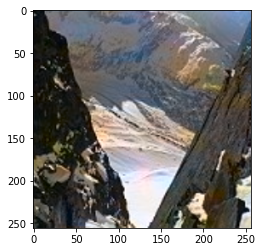

In [71]:
for i in range(len(output)):
    result = np.zeros((256, 256, 3))
    result[:,:,0] = color_me[i][:,:,0]
    result[:,:,1:] = output[i]
    plt.imshow(lab2rgb(result))


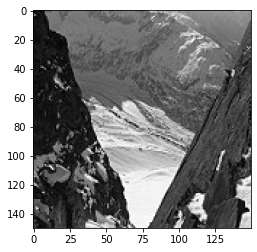

In [103]:
plt.imshow(test_img,cmap='gray')